# 03-02-2023 Exam: Regression

The notebook must include appropriate comments and must operate as follows:

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, and correlation between columns (2pt)

2. Comment the exploration of step 1 pointing out if there are predicting
columns having the absolute value of correlation with the target less
than 0.15 (2pt)

3. train test a multivariate linear regressor and show the Root Mean
Squared Error (2pt)

4. train test a multivariate linear regressor on the reduced dataset obtained
dropping the columns loosely correlated with the target, and show the
Root Mean Squared Error (2pt)

5. train and test on the reduced dataset a decision tree regressor, and show
the Root Mean Squared Error (2pt)

6. optimise the depth of the decision tree regressor of step 5 searching for
the minimum Root Mean Squared Error with cross-validation, and show
the best RMSE (3pt)

7. Comment the results (3pt)

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url = 'ml_python_labexam_2023_02_03.csv'
random_state = 42
train_size = 0.7
target = 'y'

## 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns (2pt)



In [107]:
df = pd.read_csv(url)
print('size of data is {}'.format(df.size))
df

size of data is 11000


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948
...,...,...,...,...,...,...,...,...,...,...,...
995,0.002408,0.014426,0.000431,0.602524,0.000004,0.009581,-0.023913,-0.001353,-0.018564,0.000913,-0.448586
996,0.020778,-0.006045,0.009457,0.458784,0.973221,-0.001016,-0.017422,0.028203,-0.028976,0.026134,1.310119
997,0.043912,0.002790,-0.013574,0.708325,0.138217,-0.010312,-0.000105,-0.007212,0.026115,-0.033076,1.080259
998,0.023909,0.001852,-0.003766,0.355062,0.948760,-0.002189,0.006000,0.012622,0.025405,-0.019235,3.540203


In [108]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


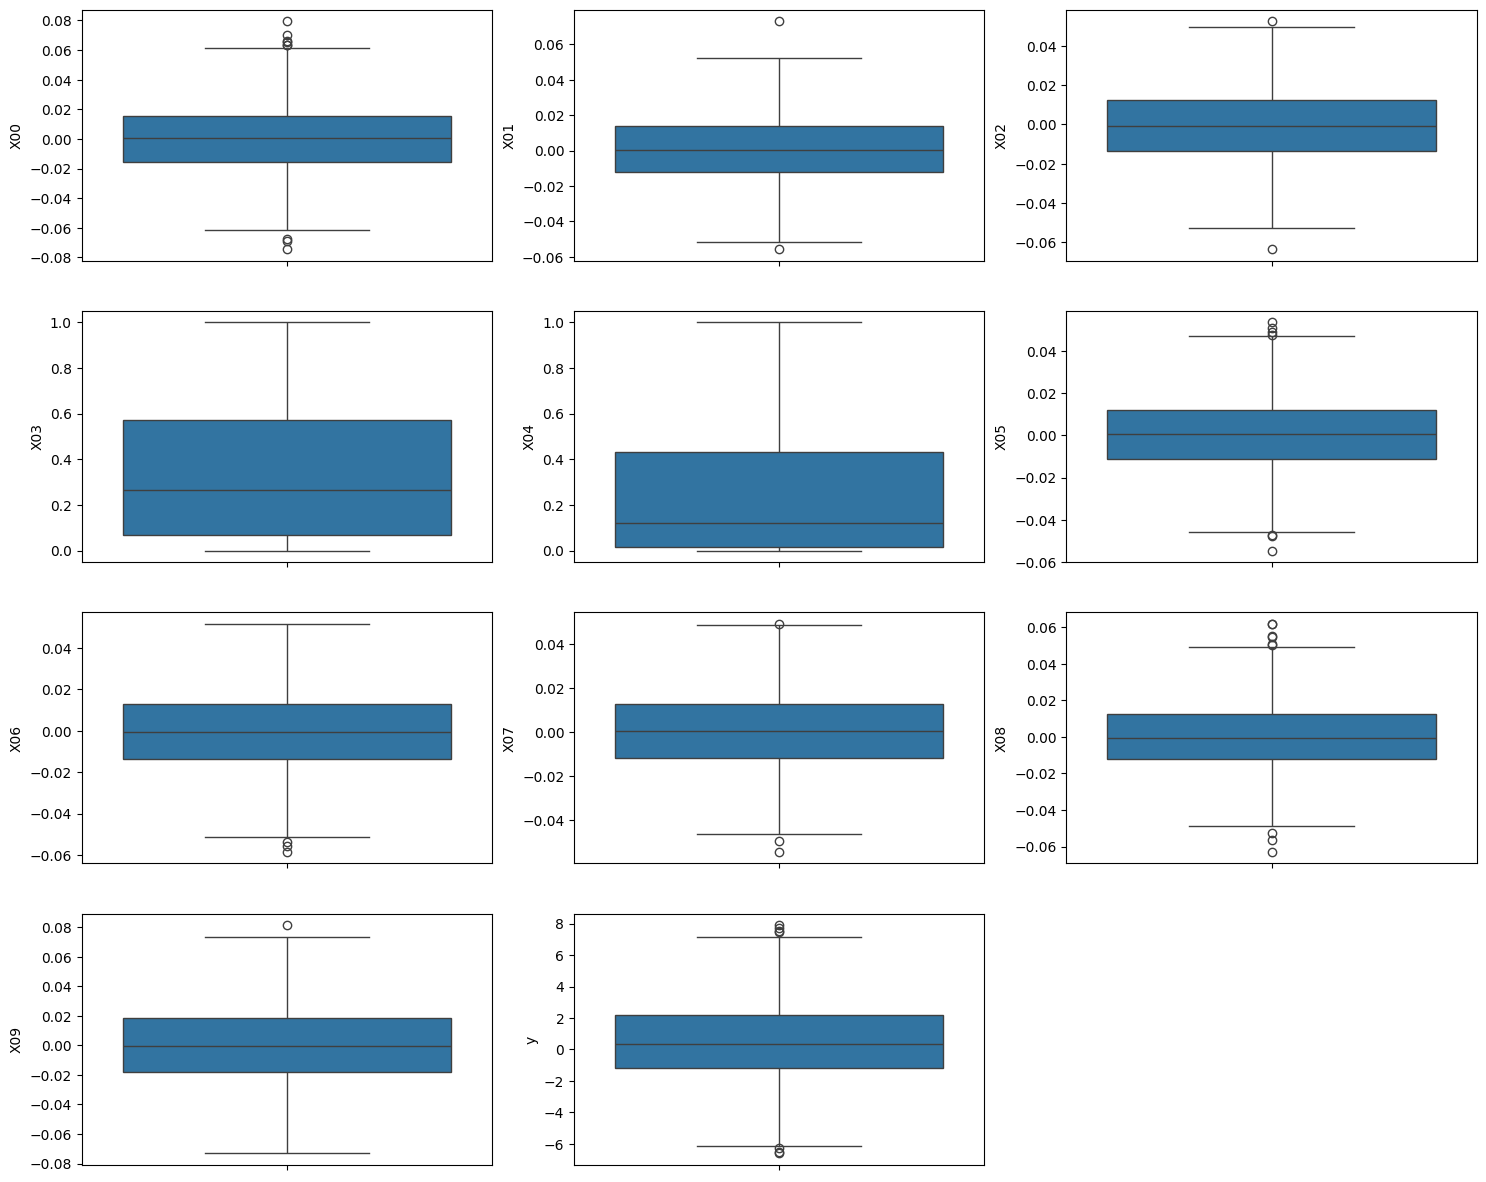

In [109]:
fig = plt.figure(figsize=(18,15))
pos = 1
for i in df.columns:
    plt.subplot(4, 3, pos)
    sns.boxplot(df[i])
    pos+=1

<Axes: >

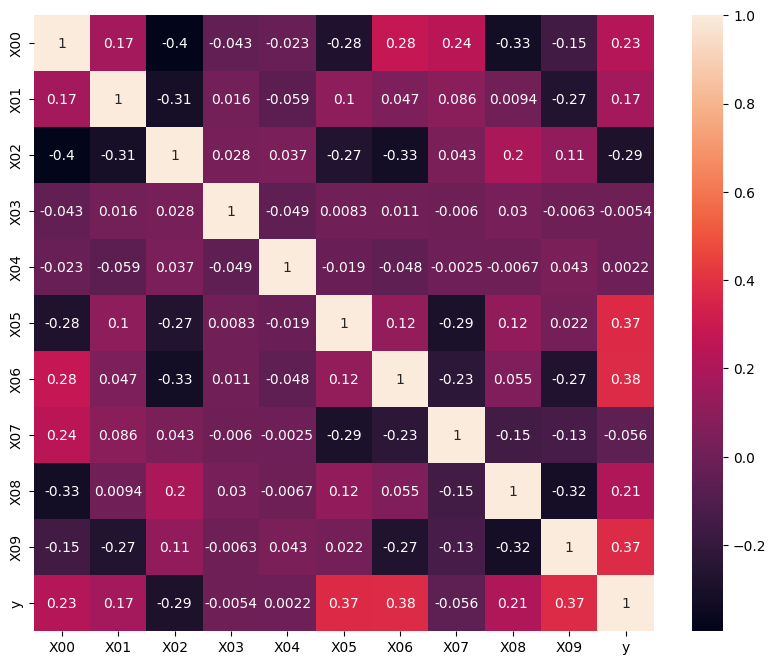

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

## 2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15 (2pt)



Value distribution seems normal except for columns X03 and X04 which are skewed towards 0.

Columns X03, X04 and X07 have an absolute correlation value lower than 0.15 with the target column (y).

## 3. train test a multivariate linear regressor and show the Root Mean Squared Error (2pt)



In [111]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(target, axis=1).copy()
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)
print('The training and testing set have {} and {} elements respectively'.format(Xtrain.shape[0], Xtest.shape[0]))

def fit_calculate_r2_rmse(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=True)

The training and testing set have 700 and 300 elements respectively


In [112]:
r2, rmse = fit_calculate_r2_rmse(LinearRegression(), Xtrain, Xtest, ytrain, ytest)
print('Multivariate Linear Regressor -> R2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Multivariate Linear Regressor -> R2: 0.856 RMSE: 0.768


## 4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error (2pt)


Dropping X03, X04 and X07 columns

In [113]:
df_red = df.drop(columns=['X03', 'X04', 'X07'], axis=1).copy()
X = df_red.drop(target, axis=1).copy()
y = df_red[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)

r2, rmse = fit_calculate_r2_rmse(LinearRegression(), Xtrain, Xtest, ytrain, ytest)
print('Multivariate Linear Regressor (Reduced Dataset) -> R2: {:.3f} RMSE: {:.3f}'.format(r2, rmse))

Multivariate Linear Regressor (Reduced Dataset) -> R2: 0.819 RMSE: 0.968


##  5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error (2pt)



In [114]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=random_state)
r2, rmse = fit_calculate_r2_rmse(dt, Xtrain, Xtest, ytrain, ytest)
prev_depth = dt.tree_.max_depth
print('Decision Tree Regressor (Reduced Dataset) -> R2: {:.3f} RMSE: {:.3f} max_depth: {}'.format(r2, rmse, prev_depth))

Decision Tree Regressor (Reduced Dataset) -> R2: 0.213 RMSE: 4.205 max_depth: 20


## 6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE (3pt)



In [115]:
from sklearn.model_selection import GridSearchCV

dt_params = [{'max_depth' : list(np.arange(1, prev_depth+1)), 'random_state' : [random_state]}]

gs = GridSearchCV(estimator=DecisionTreeRegressor()
                  , param_grid=dt_params
                  , refit=True
                  , scoring='neg_mean_squared_error' # select model with minimum mse
                  )

r2, rmse = fit_calculate_r2_rmse(gs, Xtrain, Xtest, ytrain, ytest)
print('Optimized Decision Tree Regressor (Reduced Dataset) -> R2: {:.3f} RMSE: {:.3f} max_depth: {}'.format(r2, rmse, gs.best_estimator_.tree_.max_depth))

Optimized Decision Tree Regressor (Reduced Dataset) -> R2: 0.232 RMSE: 4.104 max_depth: 7


## 7. Comment the results (3pt)

All RMSE values obtained are acceptable because they are all lower than the SD of the target "y" (2.407762) obtained with the describe() function.

Decision tree RMSE (4.352) is worse than the Multivariate Linear regressor (0.968).

Cross validation was useful with the Decision tree regressor (RMSE descreased from 4.205 to 4.104). Max depth was lowered from 20 to 7.

Cleaning the dataset increased slightly the RMSE on the Multivariate Linear regressor (from 0.768 to 0.968).